In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

import pandas as pd

#### Doubts from Previous Session

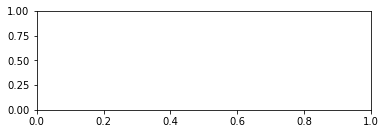

In [2]:
plt.plot([1, 2, 3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
plt.subplot(211)

C:\ProgramData\Anaconda3\envs\virtualpython2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


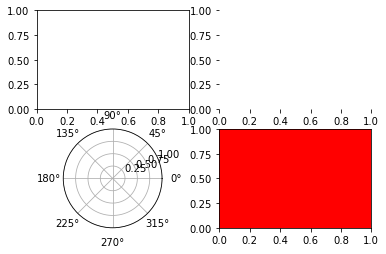

In [5]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# # delete ax2 from the figure
# plt.delaxes(ax2)

# # add ax2 to the figure again
# plt.subplot(ax2)

### Load Fifa Data

In [6]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histogram

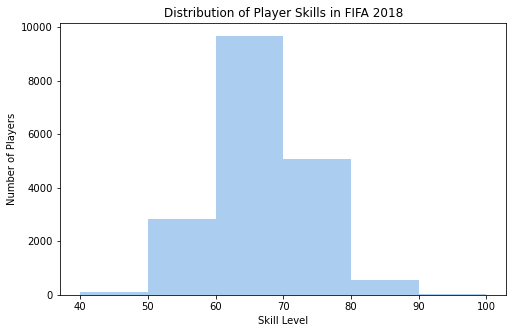

In [7]:
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(8,5))

plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.savefig('histogram.png', dpi=300)

plt.show()

### Pie Chart

In [8]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

In [10]:
right

13948

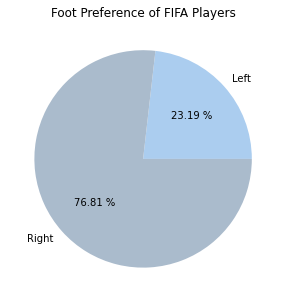

In [11]:
plt.figure(figsize=(8,5))

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

### Pie Chart #2

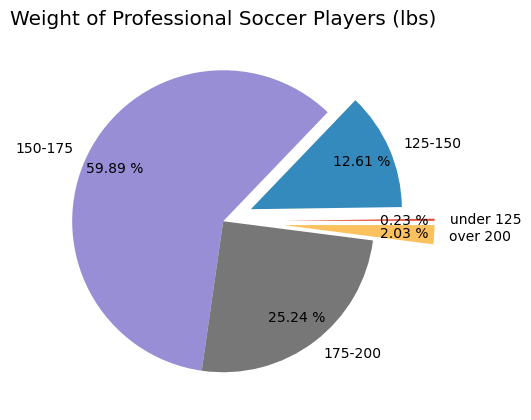

In [15]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label,explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

### Box and Whiskers Chart

In [16]:
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

In [23]:
revs

3008     73
4219     71
4957     70
5070     70
5201     70
5780     69
5823     69
6043     69
6797     68
6858     68
7006     68
7170     68
8365     67
8425     67
9360     66
9968     65
10236    65
12372    63
12752    63
13495    62
15436    59
15553    59
15634    59
15909    58
16050    58
17445    54
18170    48
Name: Overall, dtype: int64

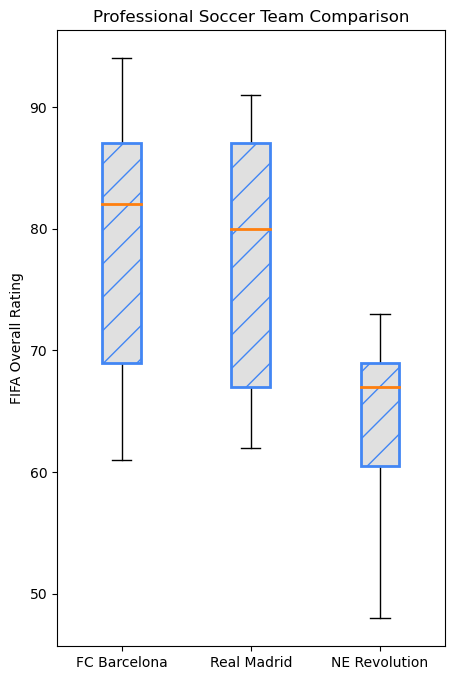

In [21]:
plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

#bp = plt.boxplot([barcelona, madrid, revs], labels=['a','b','c'], boxprops=dict(facecolor='red'))
bp = plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid','NE Revolution'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    box.set(hatch = '/')
    
plt.show()


## **Common types of plots**

- **Scatter plot**
 A simple scatter plot of random values drawn from the standard Gaussian distribution.

In [34]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

# color is given by the angle between X & Y
T = np.cos(Y/X)

In [35]:
T

array([ 0.67327007,  0.33357801,  0.99908027, ..., -0.73037716,
        0.75702391,  0.91470455])

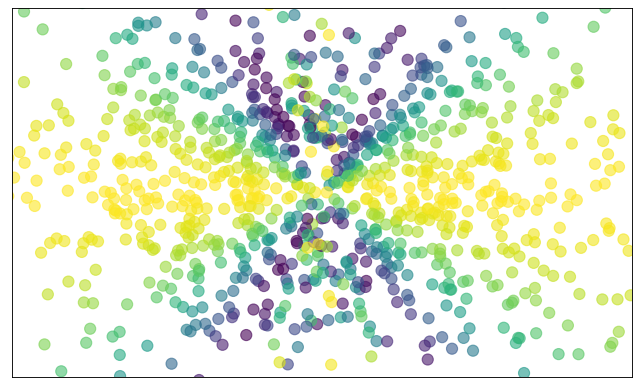

In [38]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)


# plt.axes([0.025, 0.025, 0.95, 0.95])

# The alpha blending value, between 0 (transparent) and 1 (opaque).
# s - marker size
# c - color
plt.scatter(X,Y, s=100, c=T, alpha=0.6)

plt.xlim(-2.0, 2.0), plt.xticks([])
plt.ylim(-2.0, 2.0), plt.yticks([])
plt.show()

--------

- **Contour plot**  
  A contour plot represents a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional grid. 

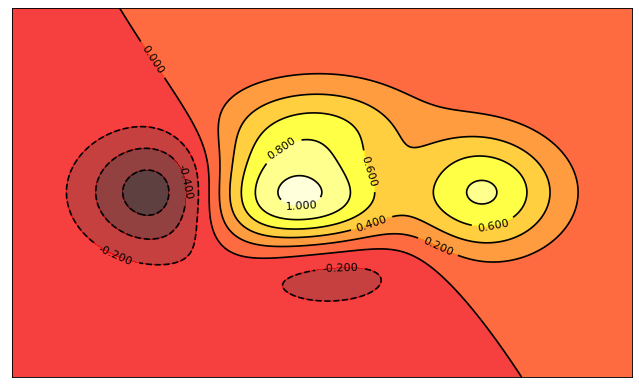

In [47]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)


def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

# # plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
plt.show()

In [45]:
C

--------

- **3D plot**  
  Represent a 3-dimensional surface.  To use 3D graphics in matplotlib, we first need to create an axes instance of the class `Axes3D`. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes, but a conventient way to create a 3D axis instance is to use the projection='3d' keyword argument to the add_axes or add_subplot functions.
  
  Note: You can't rotate the plot in jupyter notebook. Plot it as a standalone module to zoom around and visualize it by rotating.

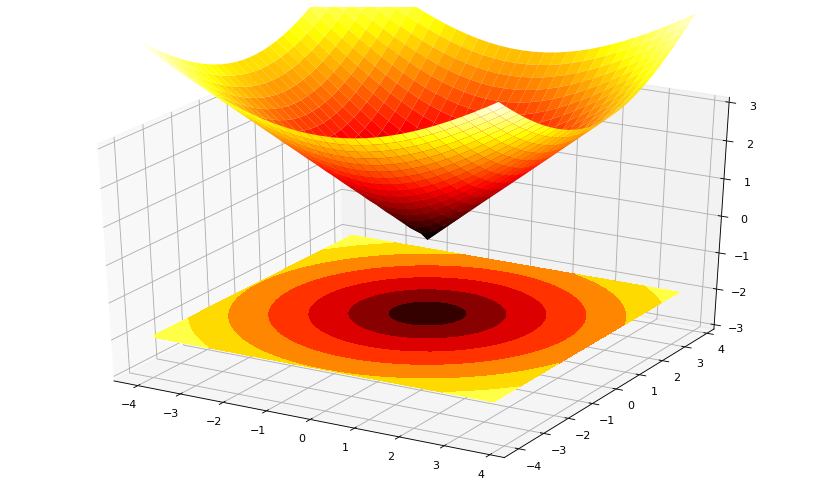

In [51]:
# create figure and set figure size and dpi (dots per inch)
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = Axes3D(fig)

# inputs
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

X, Y = np.meshgrid(X, Y)

# 3D surface
R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, R, zdir='z', offset=-2, cmap=plt.cm.hot)

# # set z axis limit
ax.set_zlim(-3, 3)

plt.show()

--------

- **3D Surface Plot**

In [53]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

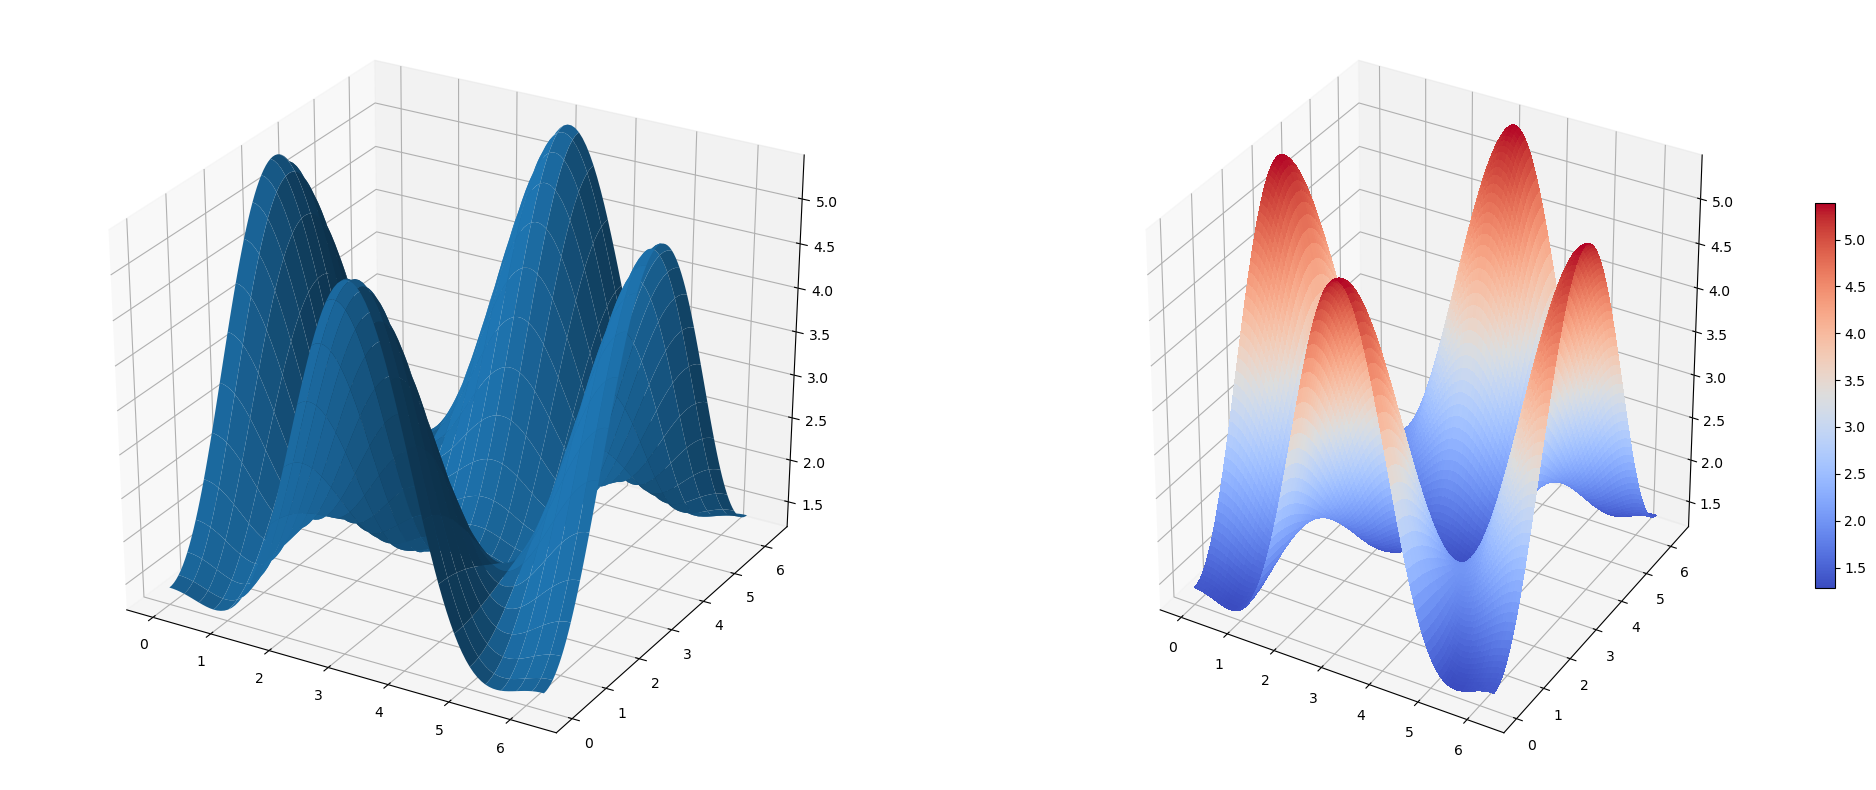

In [55]:
fig = plt.figure(figsize=(25, 10))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

plt.show()

--------

- **3D Wireframe Plot**

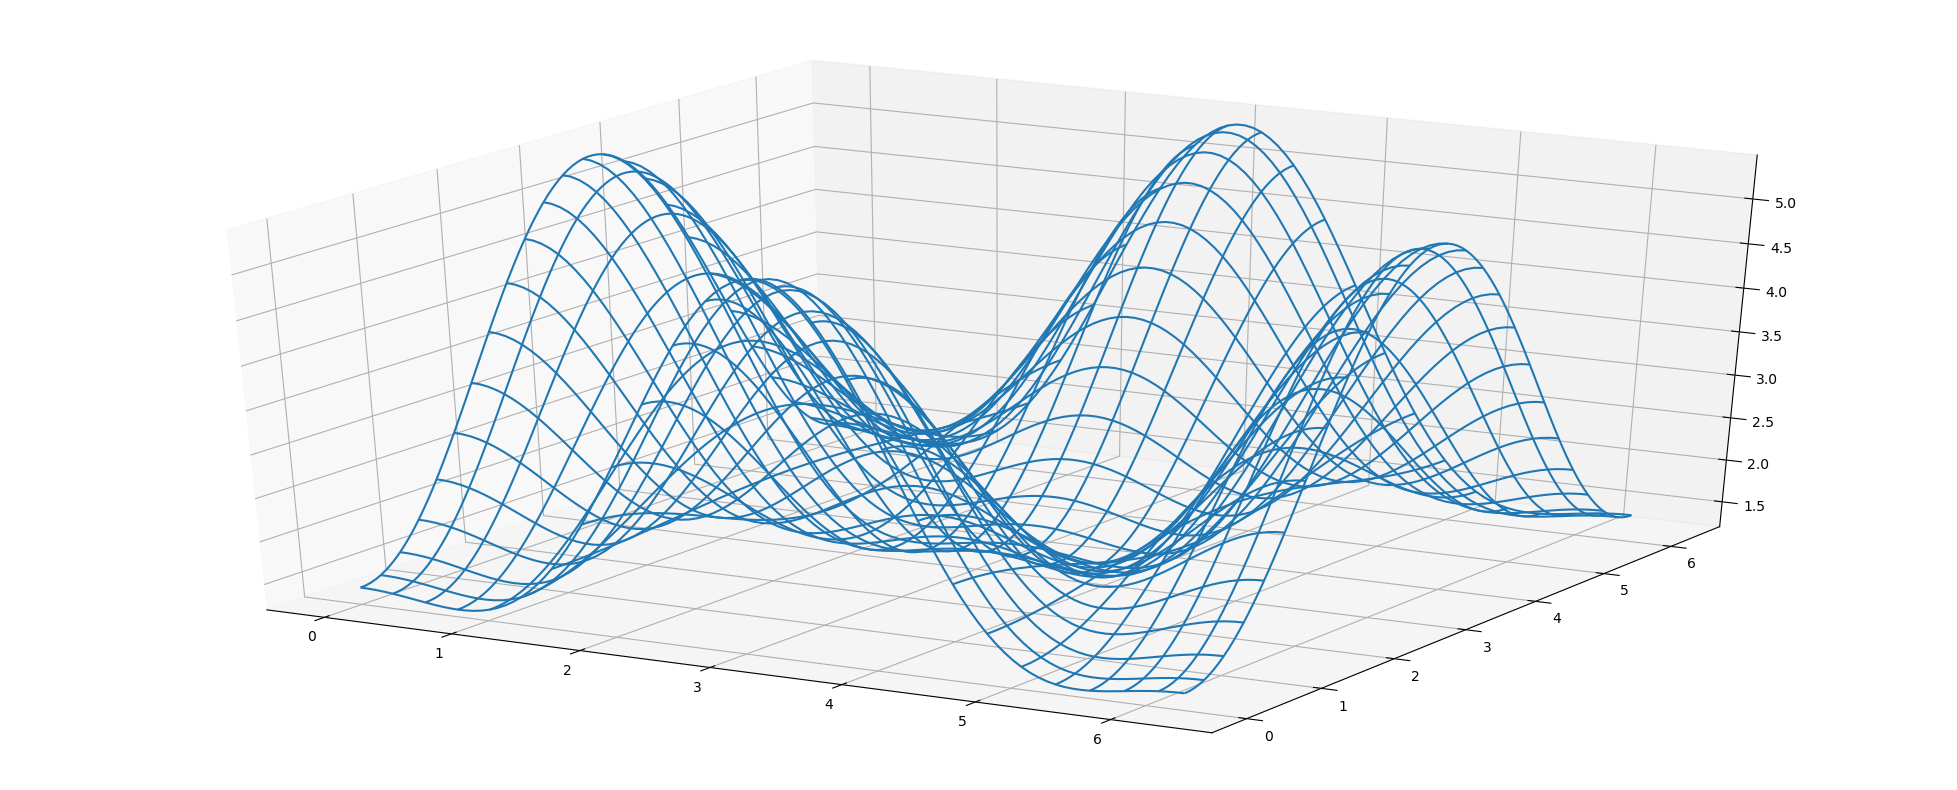

In [56]:
fig = plt.figure(figsize=(25, 10))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# create and plot a wireframe
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

plt.show()

--------

- **Coutour plots with axis level projections**

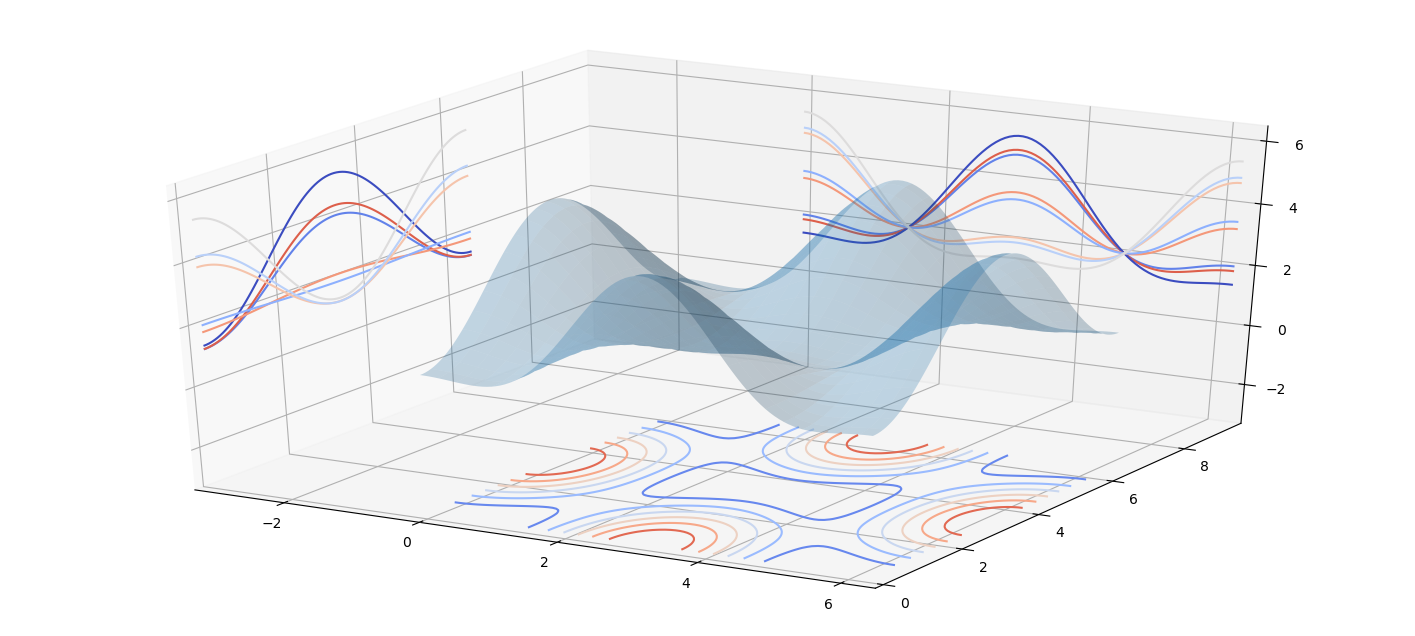

In [60]:
fig = plt.figure(figsize=(18, 8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

plt.show()

**Changing viewing angle**
 - We can change the perspective of a 3D plot using the `view_init` function, which takes two arguments: the elevation and the azimuth angles (unit degrees)

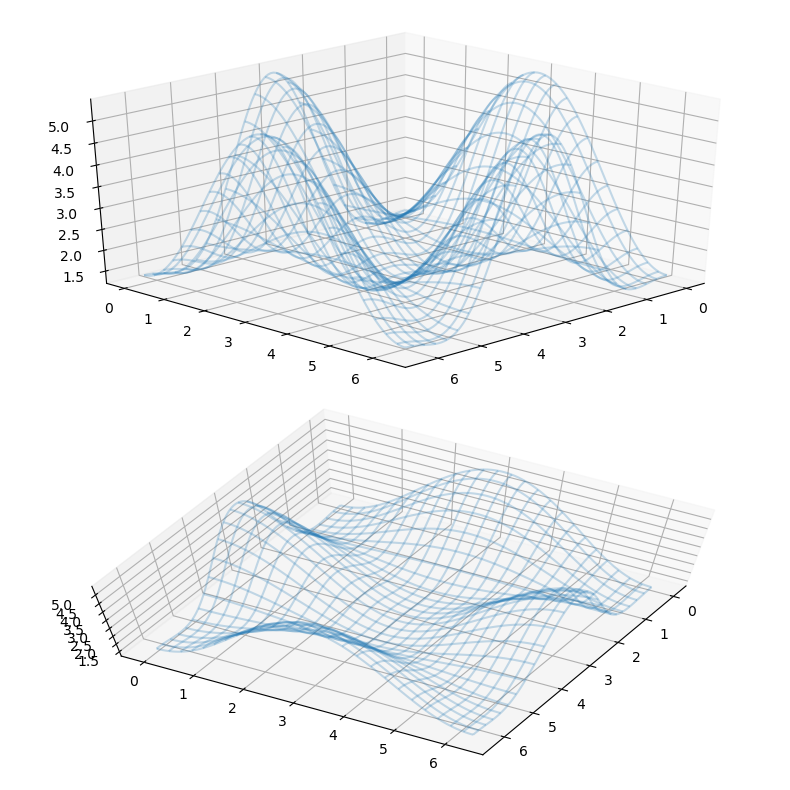

In [62]:
fig = plt.figure(figsize=(8, 8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(2,1,2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

#### 3D Bar Plot

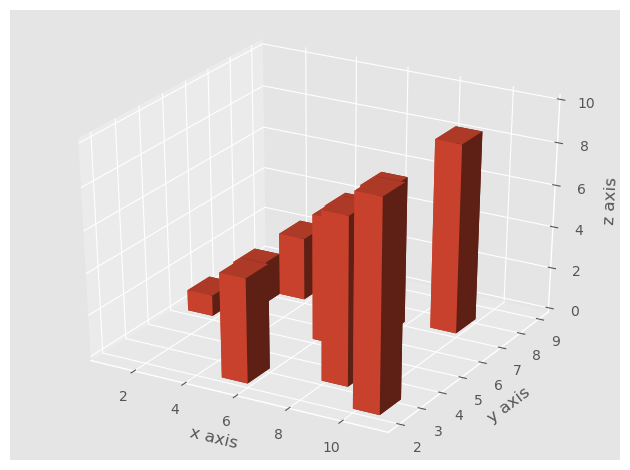

In [65]:
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.tight_layout()
plt.show()

## **Reference**

 - Adapted slightly from [Scipy-matplotlib-guide](http://www.scipy-lectures.org/intro/matplotlib/)